# Business Case Study

- The main focus is to evaluate the business data od admits based on deposits by program .
- In order to study the number of deposits in diferent programs , we will evaluate the deposits given in MM/DD/YYYY format and showcase overall distribution of data using powerfull visualisation tool such as Power BI.

Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import textdistance

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"Sample_Data.csv")
#Show the data
data

,Contact_ID,Start_Term_and_Year,Program_Desc,IPEDS_Ethnicities,IPEDS_Hispanic,Sex,Created_Date,Complete_Date,Admit_Date,Deposit_Date
0,1.0,Spring 2021,Technology Management - MS,Asian,Non-Hispanic,Male,5/22/2020,NaN,NaN,NaN
1,2.0,Fall 2020,Business Administration - MBA,White/Caucasian,Non-Hispanic,Female,3/30/2020,4/15/2020,4/24/2020,NaN
2,3.0,Fall 2019,Accounting - MS,Prefer to not respond,Non-Hispanic,Male,8/30/2018,NaN,NaN,NaN
3,4.0,Fall 2020,Management - MS,White/Caucasian,Non-Hispanic,Male,7/29/2020,NaN,NaN,NaN
4,5.0,Spring 2022,Real Estate Development - MS,Asian,Non-Hispanic,Male,2/26/2021,12/2/2021,3/1/2022,1/11/2022
...,...,...,...,...,...,...,...,...,...,...
2361,2363.0,Fall 2022,Accounting - MS,Asian,Non-Hispanic,Female,11/25/2021,1/25/2022 21:15,NaN,NaN
2362,2364.0,Fal 2021,Business Administration - MBA,Asian,Non-Hispanic,Female,1/1/2021,5/6/2021 12:41,NaN,NaN
2363,2365.0,Fall 2022,Business Administration - MBA,Black/African American,Non-Hispanic,Female,1/14/2021,9/20/2021 11:06,9/20/2021 11:06,NaN
2364,2366.0,Fall 2020,Management - MS,White/Caucasian,Non-Hispanic,Male,7/14/2020,8/4/2020,8/13/2020,NaN


There are 10 Columns whose description are as follows:

* **Contact_ID** : Unique ID assigned to each case of admits in a particular college university.
* **Start_Term_and_Year** : Start Term and year of student admitted.
* **Program_Desc** : The program description such as the Major for ehich student is admitted and type of degree.
* **IPEDS_Ethnicities** : Student description which specifies the ethnicity from which student is originated.
* **IPEDS_Hispanic** :  Describes whether the students belongs to Hispanic or Non-Hispanic Group.
* **Sex** : Specifies whether the student is Male or Female or Prefer not to Answer.
* **Created_Date** : Creation date of the student record on the database.
* **Completed_data** : Specifies the completion date of the student record on the database.
* **Admit_Date** : Specifies the admission date of the student.
* **Deposit_Date** : Specifies the date when the amount is deposited for the admission purposes.

Check the description of the data values and types 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Contact_ID           2365 non-null   float64
 1   Start_Term_and_Year  2365 non-null   object 
 2   Program_Desc         2365 non-null   object 
 3   IPEDS_Ethnicities    2365 non-null   object 
 4   IPEDS_Hispanic       2365 non-null   object 
 5   Sex                  2365 non-null   object 
 6   Created_Date         2365 non-null   object 
 7   Complete_Date        1742 non-null   object 
 8   Admit_Date           1493 non-null   object 
 9   Deposit_Date         948 non-null    object 
dtypes: float64(1), object(9)
memory usage: 185.0+ KB


* There are some NaN or Null values found in the dataset.
* Before proceeding with the data visualisation, we need to clean and remove the data which are null values since the record of each admits is unique and cannot be imputed 

## Data cleaning

Let us first create the separate dataset for the visualisation of the data.

In [4]:
data_1=data[['Program_Desc','Deposit_Date']]

In [5]:
data_1

,Program_Desc,Deposit_Date
0,Technology Management - MS,NaN
1,Business Administration - MBA,NaN
2,Accounting - MS,NaN
3,Management - MS,NaN
4,Real Estate Development - MS,1/11/2022
...,...,...
2361,Accounting - MS,NaN
2362,Business Administration - MBA,NaN
2363,Business Administration - MBA,NaN
2364,Management - MS,NaN


Dropping the Nan values 

In [6]:
data_1=data_1.dropna()
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 4 to 2360
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Program_Desc  948 non-null    object
 1   Deposit_Date  948 non-null    object
dtypes: object(2)
memory usage: 22.2+ KB


Now let us convert the deposit_date into data time format 

In [7]:
data_1['Deposit_Date']=pd.to_datetime(data_1['Deposit_Date'])

Check the data for any duplicates and repeatation. Here lets plot a plot for number of deposits on a **Monthly** basis.

<Figure size 4000x4000 with 0 Axes>

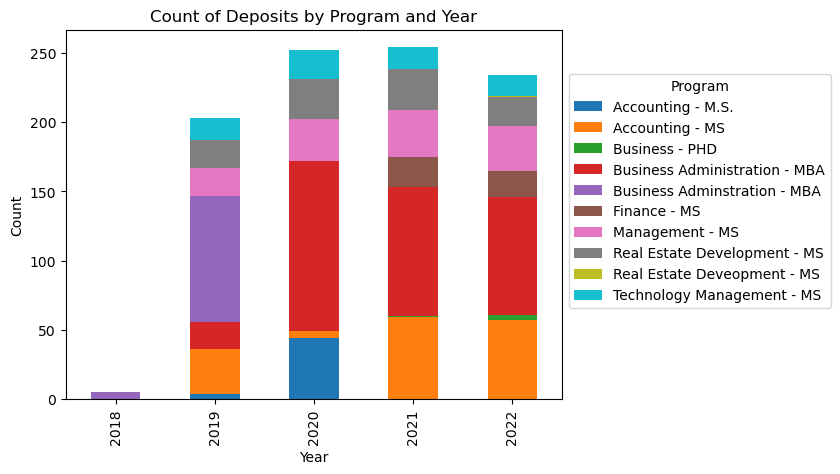

In [8]:
# Extracting the month and year from 'Deposit_Date'
data_1['Month'] = data_1['Deposit_Date'].dt.strftime('%Y-%m')
data_1['Year'] = data_1['Deposit_Date'].dt.strftime('%Y')

# Grouping by 'Year' and 'Program_Desc' and counting the occurrences
program_year_counts = data_1.groupby(['Year', 'Program_Desc']).size().unstack(fill_value=0)

plt.figure(figsize=(40,40))
program_year_counts.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Deposits by Program and Year')
plt.legend(title='Program', loc='upper left', bbox_to_anchor=(1,0.9))
plt.xticks(rotation=90)  # Rotating x-axis labels for readability
plt.show()

As you can see there are alot of duplicated value , hence we would impute this data based on Jaccard Text Distance

In [9]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 4 to 2360
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Program_Desc  948 non-null    object        
 1   Deposit_Date  948 non-null    datetime64[ns]
 2   Month         948 non-null    object        
 3   Year          948 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 37.0+ KB


In [10]:
unique_branch = ['Accounting MS','Business Administration - MBA','Real Estate Development - MS','Business - PHD','Finance - MS','Management - MS','Technology Management - MS']

comparision_string=None 

def compare_with_array(column_element):
    global comparision_string
    return textdistance.jaccard(column_element,comparision_string)



In [11]:
Program_name=pd.DataFrame()

for unique_values in unique_branch:
    comparision_string = unique_values
    Program_name[unique_values] = data_1['Program_Desc'].apply(compare_with_array)

Program_name['Final']=Program_name[['Accounting MS','Business Administration - MBA','Real Estate Development - MS','Business - PHD','Finance - MS','Management - MS','Technology Management - MS']].idxmax(axis=1)
Program_name
        
# data_1['Accounting MS']=data_1['Program_Desc'].apply(compare_with_array)
data_1['Program_Desc_Final']=Program_name['Final']
data_1['Year'] = data_1['Deposit_Date'].dt.strftime('%Y')
data_1

,Program_Desc,Deposit_Date,Month,Year,Program_Desc_Final
4,Real Estate Development - MS,2022-01-11 00:00:00,2022-01,2022,Real Estate Development - MS
10,Management - MS,2022-06-30 00:00:00,2022-06,2022,Management - MS
15,Business Adminstration - MBA,2019-07-28 00:00:00,2019-07,2019,Business Administration - MBA
16,Real Estate Development - MS,2020-10-29 00:00:00,2020-10,2020,Real Estate Development - MS
19,Management - MS,2020-04-13 00:00:00,2020-04,2020,Management - MS
...,...,...,...,...,...
2351,Business Administration - MBA,2022-06-01 14:13:00,2022-06,2022,Business Administration - MBA
2355,Accounting - MS,2019-08-24 00:00:00,2019-08,2019,Accounting MS
2356,Business Administration - MBA,2020-04-16 00:00:00,2020-04,2020,Business Administration - MBA
2359,Business Administration - MBA,2021-02-03 00:00:00,2021-02,2021,Business Administration - MBA


Let us select the new column and plot in order to check the Program description final

In [12]:
data_1 = data_1.drop('Program_Desc', axis=1)

In [13]:
data_1

,Deposit_Date,Month,Year,Program_Desc_Final
4,2022-01-11 00:00:00,2022-01,2022,Real Estate Development - MS
10,2022-06-30 00:00:00,2022-06,2022,Management - MS
15,2019-07-28 00:00:00,2019-07,2019,Business Administration - MBA
16,2020-10-29 00:00:00,2020-10,2020,Real Estate Development - MS
19,2020-04-13 00:00:00,2020-04,2020,Management - MS
...,...,...,...,...
2351,2022-06-01 14:13:00,2022-06,2022,Business Administration - MBA
2355,2019-08-24 00:00:00,2019-08,2019,Accounting MS
2356,2020-04-16 00:00:00,2020-04,2020,Business Administration - MBA
2359,2021-02-03 00:00:00,2021-02,2021,Business Administration - MBA


<Figure size 600x600 with 0 Axes>

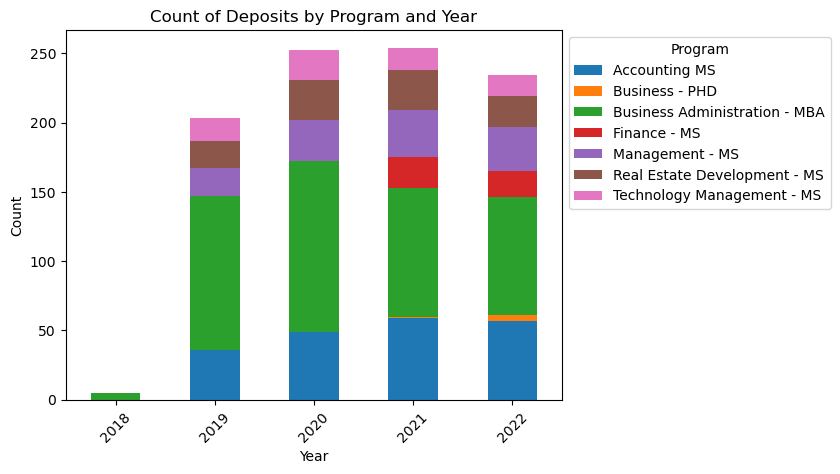

In [14]:
program_year_counts = data_1.groupby(['Year', 'Program_Desc_Final']).size().unstack(fill_value=0)

plt.figure(figsize=(6,6))
program_year_counts.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Deposits by Program and Year')
plt.legend(title='Program', loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

Hence there are no repeatition of values in the dataframe. Let us now save the data into csv

In [15]:
data_1.to_csv("Deposits_year.csv")